In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# Starting from the most recent data point in the database.
str_date = session.query(func.max(M.date)).first()[0]

recent_date = dt.datetime.strptime(str_date,"%Y-%m-%d").date()

datetime.date(2017, 8, 23)

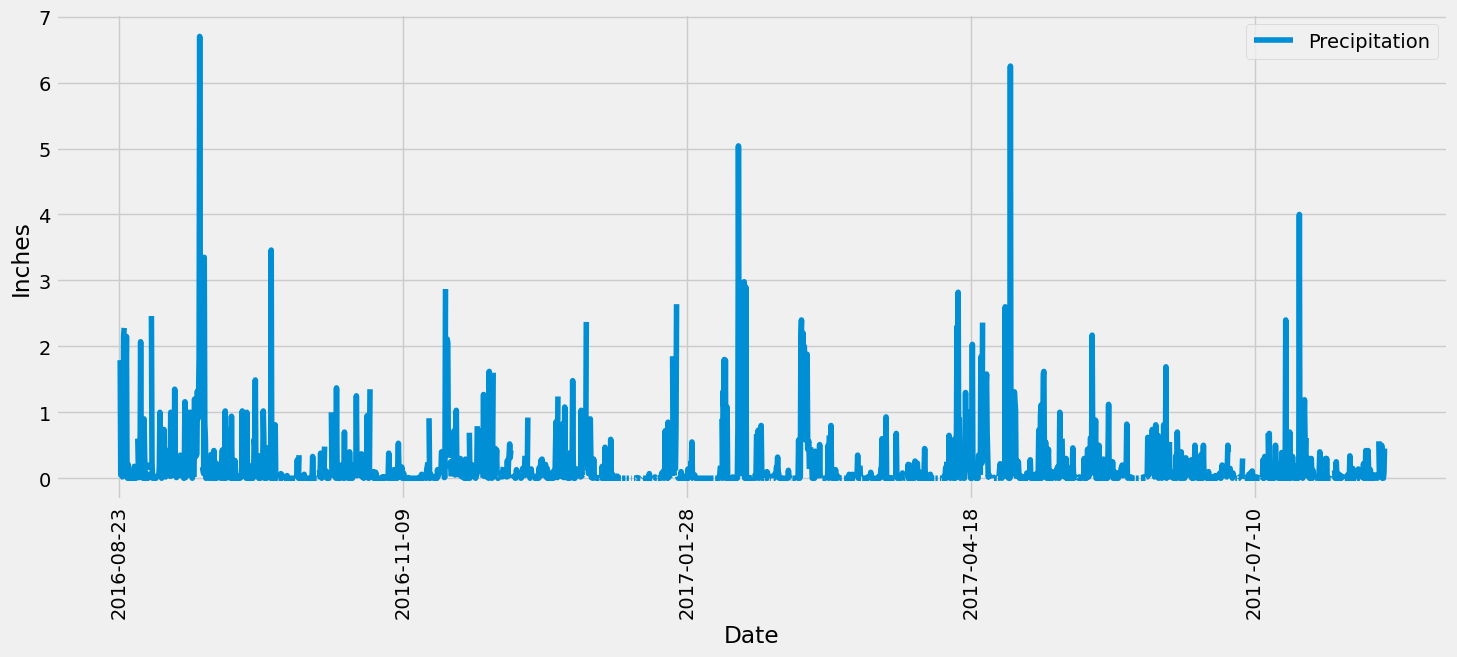

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Calculate the date one year from the last date in data set.
pre_year = recent_date - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(M.date,M.prcp).filter(M.date>=pre_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_results = pd.DataFrame(results,columns = ['Date','Precipitation']) 

# Use Pandas Plotting with Matplotlib to plot the data
precip_results.sort_values('Date').set_index('Date').plot(rot=90, figsize=[16,6])
plt.ylabel('Inches');



In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_results[['Precipitation']].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(S.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(M.station, func.count()).group_by(M.station).order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(M.tobs), func.max(M.tobs),func.avg(M.tobs)).filter(M.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

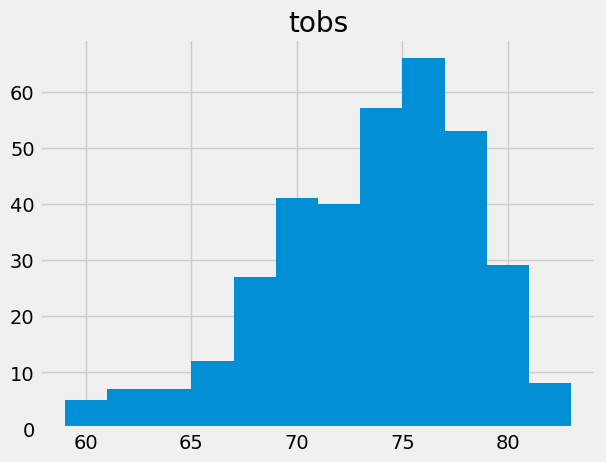

In [129]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_result = session.query(M.tobs).filter((M.station == 'USC00519281')&(M.date>=pre_year)).all()

pd.DataFrame(tobs_result).hist(bins=12)

# Close Session

In [16]:
# Close Session
session.close()